<h2> Imports </h2>

In [2]:
#import libraries
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd
import numpy as np
import uproot
from hist import Hist, axis
import os

import calculation_functions
import files_functions
import plot_function


/home/phenoprojects/MC_Samples/CODIGO_ANALISIS_VBF_DM/Analysis/signal_folder


<h3> Set up Important Variables </h3>

In [3]:
num_cuts = 0
cuts_strings = []
Signal_numevents = []
Background_numevents = []
significances = []

<h2> Find Data Files </h2>

In [4]:
#Setup dictionaries.

signal_files = {     #times 1000 to convert from pb to fb
            "DMsimpl_spin0_Y0gg1_DeltaEta2.root": 1.64749 * 1000,
            
            }

background_folders = {#"BKG_Wjets_WToLNu" : 47744.85 * 1000,
                       "Wlnu_jets": 61082.51494 * 1000,
                       "Znunu_jets": 12995.62137 * 1000}  



binning = {
    "PT": {"range": (20, 1000), "bins": 14},  # (300 - 20) / 20 = 14 bins
    "Eta*Eta": {"range": (-25, 25), "bins": 500},  # (25 - (-25)) / 0.1 = 500 bins
    "Delta_Eta": {"range": (0, 10), "bins": 100},  # (10 - 0) / 0.1 = 100 bins
    "Transverse": {"range": (0, 500), "bins": 100},  # (2000 - 500) / 20 = 75 bins
    "Eta": {"range": (-5, 5), "bins": 100},  # (5 - (-5)) / 0.1 = 100 bins
    "Phi": {"range": (-(np.pi), np.pi), "bins": 63},  
    "Invariant": {"range": (50, 3000), "bins": 148}  # (3000 - 50) / 20 = 147.5, rounded to 148 bins
}

<h2> Retrieve and Store Weights </h2>

In [5]:
signal_weights=files_functions.get_weights("signal_folder","signal")
background_weights = files_functions.get_weights(os.getcwd(), "background", signal_files,background_folders)

#TODO fix/remove those "warning" prints


signal_folder/DMsimpl_spin0_Y0gg1_DeltaEta2.root
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}


<h1>  - - PLOTTING - - </h1>

<h2> Initial Plots without any Cuts </h2>

<h3> Plot MET </h3>

{'Wlnu_jets': 61082514.94, 'Znunu_jets': 12995621.370000001}
['PhiMet0.png', 'Wlnu_jets', '.git', '.gitignore', 'plot_function.py', 'signal_folder', 'MAIN.ipynb', 'files_functions.py', 'setup_variables.py', '__pycache__', 'Znunu_jets', 'calculation_functions.py', 'README.md', 'MET0.png']


(494128.3807200007, 1978493765659.8337)

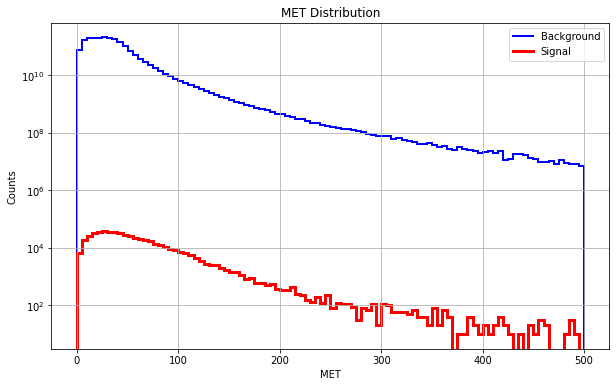

In [7]:
plot_function.PlotMET(None,signal_weights,background_weights)

<h3> Plot PhiMet </h3>


In [ ]:
plot_function.PlotPhiMet(None,signal_weight_list,background_weight_list)


<h3> Plot PTJ0,J1 </h3>

In [ ]:
plot_function.PlotJets("PT","PT",None,signal_weight_list,background_weight_list)

<h3> Plot PhiJ0,J1</h3>

In [ ]:
plot_function.PlotJets("Phi","Phi",None,signal_weight_list,background_weight_list)

<h3> Plot EtaJ0,J1 </h3>

In [ ]:
plot_function.PlotJets("Eta","Eta",None,signal_weight_list,background_weight_list)

<h3> Plot Eta(j0)*Eta(j1)</h3>

In [ ]:
etaeta_sig_hist, etaeta_bkg_hist = plot_function.PlotEtaEta(None,signal_weight_list,background_weight_list)


<h3> Plot DeltaEta</h3>

In [ ]:
deltaeta_sig_hist, deltaeta_bkg_hist = plot_function.PlotDeltaJets(None,signal_weight_list,background_weight_list)

<h3> Plot InvariantMass </h3>

In [ ]:
currSigEvents, currBkgEvents = plot_function.PlotInvariantMass(None,signal_weight_list,background_weight_list)


<h1> Before Any Cuts </h1>

In [ ]:
#Add current statistics to cut chart
Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)

currSignificance = calculation_functions.calculateSignificance(numSig=currSigEvents, numBkg=currBkgEvents)
significances.append(currSignificance)

<h2> Cut 1 </h2>

<h3> Eta(j0)*Eta(j1) < 0/h3>

In [ ]:
#Cut for eta(j0)*eta(j1) >=0
def mask_etaeta_condition(df):
    # Extract Eta for j0 and j1
    eta_j0 = df["Jet.Eta"].apply(lambda x: x[0] if len(x) > 0 else None)
    eta_j1 = df["Jet.Eta"].apply(lambda x: x[1] if len(x) > 1 else None)

    # Create mask where Eta(j0) * Eta(j1) < 0
    return (eta_j0 * eta_j1) < 0

maskList.append(mask_etaeta_condition)
cuts_strings.append("Eta(j0) * Eta(j1) < 0")

In [ ]:
# Plot and store necessary calculations
currSigEvents, currBkgEvents = plot_function.PlotInvariantMass(maskList,signal_weight_list,background_weight_list)
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

Signal_numevents.append(currSigEvents)
Background_numevents.append(currSigEvents)
significances.append(currSignificance)


<h2> Cut 2 </h2>

<h3> Pt(j0) > 30</h3>